# ExoPredict-Data Analysis

# Pre-Processing


In [1]:
import os
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.5.4/spark-3.5.4-bin-hadoop3.tgz
!tar xf spark-3.5.4-bin-hadoop3.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.4-bin-hadoop3"

In [2]:
# Import findspark and initialise.
import findspark
findspark.init()

In [5]:
# Upload the Clened Dataset file from output
from google.colab import files
uploaded = files.upload()

Saving Cleaned Dataset.csv to Cleaned Dataset.csv


In [6]:
# Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder.appName("ExoPlanet_ETL_Project").getOrCreate()

In [8]:
# Read the file
file_path = "Cleaned Dataset.csv"

df = spark.read.option("header", "true").option("inferSchema", "true").csv(file_path)
df.show(5)

+---------------+-------------+-----------+----------------+--------------+--------------------+--------------------+-------------------+--------------------------+--------------------------+------------------+-------------------+-------+-----------------+---------+------------+--------------------+--------+-----------------------+--------+--------+---------+--------+--------------------+-----------+------------------+------------+------------+----------+-----------------+---------------+----------------+--------------------+--------------------+------------+-----------+-----------+------------------+-----------------------+-------------------------+--------------+--------------------+--------------------+----------------------+------------------------+
|    Planet_Name|    Host_Star|Num_Planets|Discovery_Method|Discovery_Year|  Discovery_Facility|      Reference_Name|Orbital_Period_Days|Orbital_Period_Error_Upper|Orbital_Period_Error_Lower|Semi_Major_Axis_AU|Planet_Radius_Earth|pl_rad

#### Data Analysis
 1. How do planetary characteristics influence the likelihood of being in the habitable zone? (Mandeep)

 2. How does a planet’s orbit impact its temperature and potential habitability?(Mandeep)

In [9]:
# Import necessary libraries
from pyspark.sql.types import IntegerType, DoubleType, DateType
from pyspark.sql.functions import col, isnan, when, count, monotonically_increasing_id
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer
from pyspark.ml.clustering import KMeans
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

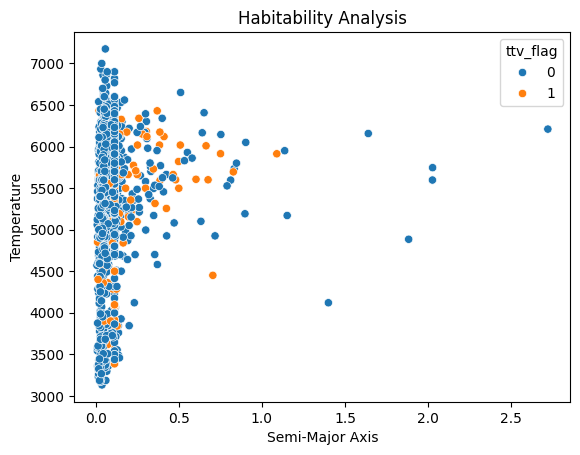

In [11]:
# Habitability Analysis based upon temperature
df_habitable = df.select('Semi_Major_Axis_AU','Star_Temperature_K', 'ttv_flag')

#Convert to Pandas for Visualisation
df_habitable_pd = df_habitable.toPandas()

sns.scatterplot(data=df_habitable_pd, x= 'Semi_Major_Axis_AU', y='Star_Temperature_K', hue='ttv_flag')
plt.xlabel("Semi-Major Axis")
plt.ylabel("Temperature")
plt.title("Habitability Analysis")
plt.savefig("habitability_analysis.png")
plt.show()

#Save the Results
df_habitable_pd.to_csv("habitability_analysis.csv", index=False)

In [12]:
# Check and update the datatype for SQL Loading process
df_habitable_pd.dtypes

,0
Semi_Major_Axis_AU,float64
Star_Temperature_K,float64
ttv_flag,int32


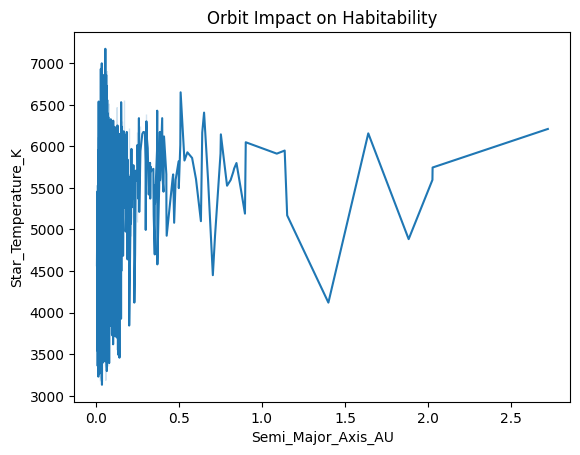

In [13]:
# Orbit Impact on Habitability ---
df_orbit = df.select('Semi_Major_Axis_AU', 'Star_Temperature_K')


#Convert to Pandas for Visualisation
df_orbit_pd = df_orbit.toPandas()

sns.lineplot(data=df_orbit_pd, x='Semi_Major_Axis_AU', y='Star_Temperature_K')
plt.xlabel('Semi_Major_Axis_AU')
plt.ylabel('Star_Temperature_K')
plt.title("Orbit Impact on Habitability")
plt.savefig("orbit_temperature_analysis.png")
plt.show()

#Save the Results
df_orbit_pd.to_csv("orbit_temperature_analysis.csv", index=False)

In [14]:
df_orbit_pd.dtypes

,0
Semi_Major_Axis_AU,float64
Star_Temperature_K,float64


Q1 & Q2: Classify planets by insolation, temperature, mass, coordinates with regards of available planets (Iarsolav)
Complete dataset, it'll be helpful to draw graphics with stars located across sphere (Iarsolav)

In [ ]:
# # --- Question 3 & 4: Classification by Insolation, Temperature, Mass, Coordinates ---
# df_class2 = df.select('Insolation_Flux', 'temperature', 'mass', 'ra', 'dec')

# #Convert to Pandas for Visualisation
# df_class2_pd = df_class2.toPandas()
# sns.pairplot(df_class2_pd)
# plt.savefig("classification_insolation_temp_mass_coordinates.png")
# plt.show()

# #Save the Results
# df_class2.toPandas().to_csv("classification_insolation_temp_mass_coordinates.csv", index=False)

In [ ]:
#Export CSV and visualisations

# Patrick
Question 1: Can we identify groups of similar exoplanets?
Analysis: Apply clustering algorithms (e.g., K-means, hierarchical clustering) to group planets with similar characteristics.
Question 2: Can we classify planets into different categories (e.g., rocky planets, gas giants) based on their properties?
Analysis: Use supervised learning algorithms to classify planets based on features such as mass, radius, and temperature.

In [ ]:
# # --- Question 1: Clustering Exoplanets ---
# df = df.withColumnRenamed("Planet_Radius_Earth", "radius").withColumnRenamed("Planet_Mass_Earth", "mass").withColumnRenamed("Equilibrium_Temperature", "temperature").withColumnRenamed("Semi_Major_Axis_AU", "semi_major_axis")

# features = ['radius', 'mass', 'temperature', 'semi_major_axis']
# vector_assembler = VectorAssembler(inputCols=features, outputCol='features')
# df_features = vector_assembler.transform(df)

# scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
# df_scaled = scaler.fit(df_features).transform(df_features)

# kmeans = KMeans(featuresCol='scaledFeatures', k=3, seed=42)
# kmeans_model = kmeans.fit(df_scaled)
# df_clusters = kmeans_model.transform(df_scaled)
# df_clusters.select('Planet_Name', 'prediction').show(10)

# # Convert to pandas for visualisation
# df_clusters_pd = df_clusters.toPandas()
# sns.scatterplot(data=df_clusters_pd, x=df_clusters_pd['radius'], y=df_clusters_pd['mass'], hue=df_clusters_pd['prediction'])
# plt.savefig("clustering_visualization.png")
# plt.show()

# # Save the results
# df_clusters.toPandas().to_csv("clustering_results.csv", index=False)

In [ ]:
# # --- Question 2: Classification of Planets ---
# df_class = df.select('radius', 'mass', 'temperature', 'Discovery_Method')

# # Convert string column to numeric
# indexer = StringIndexer(inputCol="Discovery_Method", outputCol="Discovery_Method_Index")
# df_class = indexer.fit(df_class).transform(df_class)

# vector_assembler_class = VectorAssembler(inputCols=['radius', 'mass', 'temperature'], outputCol='features')
# df_class_features = vector_assembler_class.transform(df_class)

# rf = RandomForestClassifier(labelCol='Discovery_Method_Index', featuresCol='features', numTrees=10)
# rf_model = rf.fit(df_class_features)
# df_pred = rf_model.transform(df_class_features)

# evaluator = MulticlassClassificationEvaluator(labelCol="Discovery_Method_Index", predictionCol="prediction", metricName="accuracy")
# accuracy = evaluator.evaluate(df_pred)
# print(f"Classification Accuracy: {accuracy}")


# #Convert to Pandas for Visualisation
# df_pred_pd = df_pred.select("Discovery_Method_Index", "prediction").toPandas()
# sns.histplot(data=df_pred_pd, x='prediction', kde=True)
# plt.xlabel("Predicted Class")
# plt.ylabel("Frequency")
# plt.title("Distribution of Predicted Planet Types")
# plt.savefig("classification_visualization.png")
# plt.show()


# # Save classification results
# df_pred.toPandas().to_csv("classification_results.csv", index=False)

In [ ]:
#Export CSV and visualisations

# Amrit
1. Is there a correlation between specific discovery facilities and the methods they use to detect exoplanets, and how does this impact the types of planets discovered?
2. How does the distance of a planet host from its exoplanets influence the exoplanets' temperature, luminosity, and color, and what patterns emerge across different star-planet systems?

In [15]:
clean_df = df.cache()

In [16]:
# Check the cached dataframe
clean_df.show(2)

+---------------+-------------+-----------+----------------+--------------+--------------------+--------------------+-------------------+--------------------------+--------------------------+------------------+-------------------+-------+-----------------+---------+------------+--------------------+--------+-----------------------+--------+--------+---------+--------+--------------------+-----------+------------------+------------+------------+----------+-----------------+---------------+----------------+--------------------+--------------------+------------+-----------+----------+------------------+-----------------------+-------------------------+--------------+--------------------+--------------------+----------------------+------------------------+
|    Planet_Name|    Host_Star|Num_Planets|Discovery_Method|Discovery_Year|  Discovery_Facility|      Reference_Name|Orbital_Period_Days|Orbital_Period_Error_Upper|Orbital_Period_Error_Lower|Semi_Major_Axis_AU|Planet_Radius_Earth|pl_radj

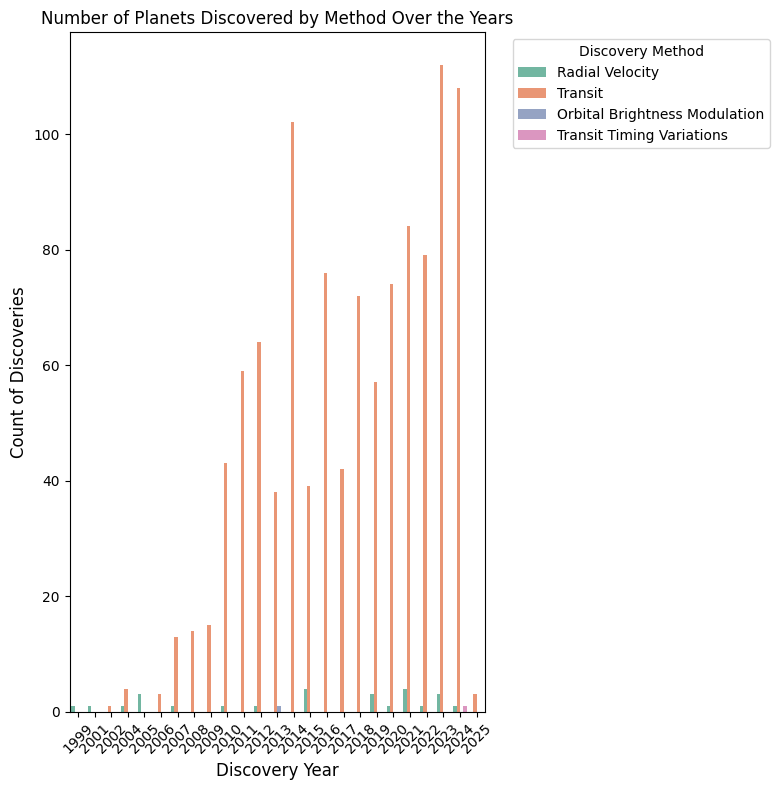

In [17]:
# Assuming clean_df is your PySpark DataFrame
df = clean_df.select("Discovery_Method", "Discovery_Facility", "Host_Star", "Discovery_Year")

# Convert PySpark DataFrame to Pandas
pandas_df = df.toPandas()

# Save the Pandas DataFrame to a CSV file
pandas_df.to_csv("discovery_data.csv", index=False)

# Create a count plot to visualize discovery methods and facilities over the years
plt.figure(figsize=(8, 8))

# Use seaborn to create the plot
sns.countplot(data=pandas_df, x="Discovery_Year", hue="Discovery_Method", palette="Set2")

# Set labels and title
plt.title("Number of Planets Discovered by Method Over the Years")
plt.xlabel("Discovery Year", fontsize=12)
plt.ylabel("Count of Discoveries", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Discovery Method", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig("discovery_plot.png")

# Show the plot
plt.show()



In [18]:
# Create a temporary view of the dataframe
clean_df.createOrReplaceTempView('discovery_method')

In [19]:
# find the planet names and its host_stars that were discovered by 'Transit' method each yaer
result=spark.sql("SELECT Planet_Name, Discovery_Method, Discovery_Year FROM discovery_method WHERE Discovery_Method IN ('Transit', 'Radial Velocity', 'Orbital Brightness Modulation', 'Transit Timing Variations') ORDER BY Discovery_Year")
result.show(5)

+-------------+----------------+--------------+
|  Planet_Name|Discovery_Method|Discovery_Year|
+-------------+----------------+--------------+
|  HD 209458 b| Radial Velocity|          1999|
|   HD 80606 b| Radial Velocity|          2001|
| OGLE-TR-56 b|         Transit|          2002|
|OGLE-TR-113 b|         Transit|          2004|
|     55 Cnc e| Radial Velocity|          2004|
+-------------+----------------+--------------+
only showing top 5 rows



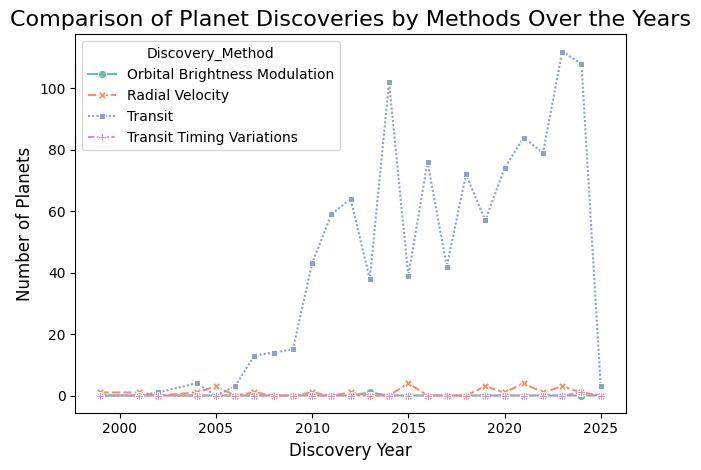

In [20]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = result.toPandas()

# Save the Pandas DataFrame to a CSV file
pandas_df.to_csv("discovery_methods_comparison.csv", index=False)

# Count the number of planets discovered per year for each method
planet_counts = pandas_df.groupby(['Discovery_Year', 'Discovery_Method']).size().unstack(fill_value=0)

# Create a line plot comparing the four methods
plt.figure()
sns.lineplot(data=planet_counts, palette="Set2", markers=True)

# Set labels and title
plt.title("Comparison of Planet Discoveries by Methods Over the Years", fontsize=16)
plt.xlabel("Discovery Year", fontsize=12)
plt.ylabel("Number of Planets", fontsize=12)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig("discovery_methods_comparison_line_graph.png")

# Show the plot
plt.show()


In [21]:
clean_df.show(2)

+---------------+-------------+-----------+----------------+--------------+--------------------+--------------------+-------------------+--------------------------+--------------------------+------------------+-------------------+-------+-----------------+---------+------------+--------------------+--------+-----------------------+--------+--------+---------+--------+--------------------+-----------+------------------+------------+------------+----------+-----------------+---------------+----------------+--------------------+--------------------+------------+-----------+----------+------------------+-----------------------+-------------------------+--------------+--------------------+--------------------+----------------------+------------------------+
|    Planet_Name|    Host_Star|Num_Planets|Discovery_Method|Discovery_Year|  Discovery_Facility|      Reference_Name|Orbital_Period_Days|Orbital_Period_Error_Upper|Orbital_Period_Error_Lower|Semi_Major_Axis_AU|Planet_Radius_Earth|pl_radj

In [22]:
result_2 = spark.sql("""
    SELECT Planet_Name, System_Distance_PC, Star_Temperature_K, System_Infrared_Magnitude
    FROM discovery_method
""")
result_2.show(2)

+---------------+------------------+------------------+-------------------------+
|    Planet_Name|System_Distance_PC|Star_Temperature_K|System_Infrared_Magnitude|
+---------------+------------------+------------------+-------------------------+
|   Kepler-138 c|           66.8624|            3841.0|                    9.506|
|TIC 139270665 b|           189.875|            5844.0|                    8.946|
+---------------+------------------+------------------+-------------------------+
only showing top 2 rows



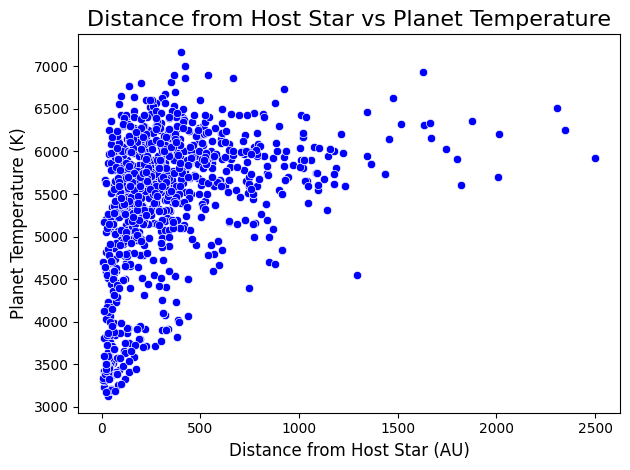

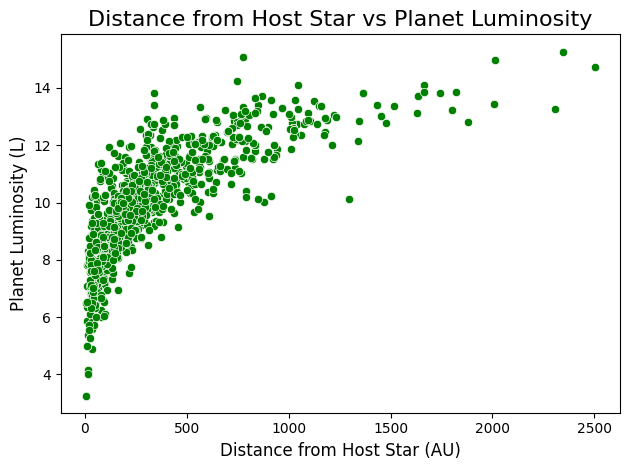

In [23]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = result_2.toPandas()

# Save the Pandas DataFrame to a CSV file
pandas_df.to_csv("planet_data_with_distance.csv", index=False)

# 1. Scatter plot for Distance vs Temperature
plt.figure()
sns.scatterplot(x='System_Distance_PC', y='Star_Temperature_K', data=pandas_df, color='blue')
plt.title("Distance from Host Star vs Planet Temperature", fontsize=16)
plt.xlabel("Distance from Host Star (AU)", fontsize=12)
plt.ylabel("Planet Temperature (K)", fontsize=12)
plt.tight_layout()
plt.savefig("distance_vs_temperature.png")
plt.show()

# 2. Scatter plot for Distance vs Luminosity
plt.figure()
sns.scatterplot(x='System_Distance_PC', y='System_Infrared_Magnitude', data=pandas_df, color='green')
plt.title("Distance from Host Star vs Planet Luminosity", fontsize=16)
plt.xlabel("Distance from Host Star (AU)", fontsize=12)
plt.ylabel("Planet Luminosity (L)", fontsize=12)
plt.tight_layout()
plt.savefig("distance_vs_luminosity.png")
plt.show()



In [ ]:
#Export CSV and visualisations